In [135]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

In [137]:
scores = net.loss(X)
print ('Your scores:')
print (scores)

print ('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print (correct_scores)
print(correct_scores.shape)

# The difference should be very small. We get < 1e-7
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.8123 -1.2765 -0.7034]
 [-0.1713 -1.188  -0.4731]
 [-0.5159 -1.0135 -0.8504]
 [-0.1542 -0.4863 -0.529 ]
 [-0.0062 -0.1244 -0.1523]]
correct scores:
[[-0.8123 -1.2765 -0.7034]
 [-0.1713 -1.188  -0.4731]
 [-0.5159 -1.0135 -0.8504]
 [-0.1542 -0.4863 -0.529 ]
 [-0.0062 -0.1244 -0.1523]]
(5, 3)
Difference between your scores and correct scores:
3.6802720496109664e-08


In [138]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


In [95]:
np.set_printoptions(suppress = True, precision = 4)

In [132]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  #print(param_name)
  num_grad = param_grad_num
  a_grad = grads[param_name]
  #print('num_grad:\n {}\n analytic_grad:\n {}. Difference is {:.2f}'.format(num_grad, a_grad, np.mean(num_grad - a_grad)))
  print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 5.334868e-11
W2 max relative error: 1.443357e-08
b1 max relative error: 6.931519e-09
W1 max relative error: 6.709144e-08


iteration 0 / 1000: loss 1.241994
iteration 100 / 1000: loss 0.015891
iteration 200 / 1000: loss 0.014784
iteration 300 / 1000: loss 0.013544
iteration 400 / 1000: loss 0.015392
iteration 500 / 1000: loss 0.015619
iteration 600 / 1000: loss 0.013939
iteration 700 / 1000: loss 0.014976
iteration 800 / 1000: loss 0.015368
iteration 900 / 1000: loss 0.016128
Final training loss:  0.01650473023882173


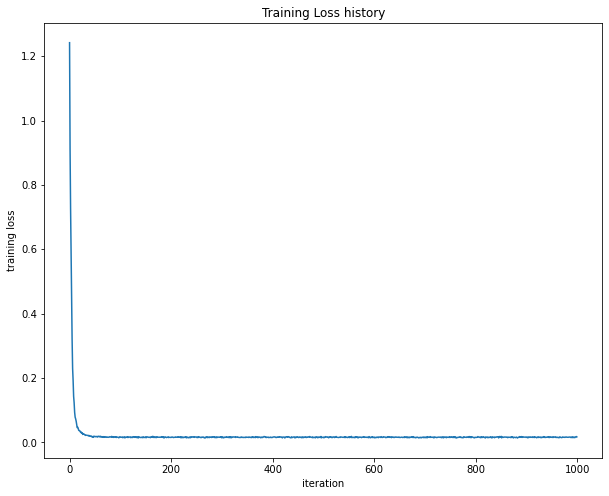

In [139]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=1000, verbose=True)

print ('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()